# **게임 데이터 분석**

 
### 미션
1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까? - 장르, 플랫폼
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### 데이터 정보
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 배급한 회사입니다.
-NA_Sales : 북미지역에서의 출고량입니다.
-EU_Sales : 유럽지역에서의 출고량입니다.
-JP_Sales : 일본지역에서의 출고량입니다.
-Other_Sales : 기타지역에서의 출고량입니다.

## EDA 
- 범주형 데이터 : Name/Platform/Genre/Publisher
- 연속형 데이터 : Year/NA_Sales/EU_Sales/JP_Sales/Other_Sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project1/vgames2.csv')
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(100)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.00,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.00,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.00,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
95,Robotron 64,N64,1998.00,Shooter,GT Interactive,0.07,0.02,0,0
96,Gummy Bears Magical Medallion,Wii,2011.00,Platform,Storm City Games,0.02,0,0,0
97,Tony Hawk's Pro Skater 2,N64,2001.00,Sports,Activision,0.59,0.16,0,0.01
98,Red Steel 2,Wii,2010.00,Shooter,Ubisoft,0.36,0.21,0.01,0.06


In [ ]:
df.describe() 
# 결측치 존재 확인, 

,Year
count,16327.00
mean,1994.24
std,155.08
min,0.00
25%,2003.00
50%,2007.00
75%,2010.00
max,2020.00


## **전처리**


### 중복값 제거

In [ ]:
df[df.duplicated()]
df[df['Name']=='Wii de Asobu: Metroid Prime']
df.drop(9184, axis=0, inplace=True)
# df[df.duplicated()]
# df.shape

### 결측치 처리

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#결측치 데이터 갯수
df_null = df.loc[(df['Year'].isnull())|(df['Genre'].isnull())|(df['Publisher'].isnull())]
df_null.shape[0]

356

In [ ]:
#결측치 제거해도 문제 없는지 확인
round((df_null.shape[0] / df.shape[0]) * 100, 3)

2.145

In [ ]:
# 2퍼센트 전체 드롭 - year, genre, publisher 중 하나만 없어도 드랍
df_drop = df.dropna()
df_drop = df_drop.reset_index(drop=True)
df_drop

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.00,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.00,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.00,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.00,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.00,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.00,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.00,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df_drop[df_drop['Platform']=='DS']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.00,Action,Destineer,0.04,0,0,0
3,Deal or No Deal: Special Edition,DS,2010.00,Misc,Zoo Games,0.04,0,0,0
5,Power Pro Kun Pocket 8,DS,2005.00,Sports,Konami Digital Entertainment,0,0,0.14,0
13,The Professor's Brain Trainer: Logic,DS,2005.00,Puzzle,505 Games,0.02,0,0,0
14,Zoids Dash,DS,2006.00,Role-Playing,Tomy Corporation,0,0,0.02,0
...,...,...,...,...,...,...,...,...,...
16199,ASH: Archaic Sealed Heat,DS,2007.00,Role-Playing,Nintendo,0,0,0.12,0
16206,Sherlock Holmes: The Mystery of the Mummy,DS,2009.00,Adventure,Focus Home Interactive,0.06,0.3,0,0.04
16216,GoldenEye 007 (2010),DS,2010.00,Action,Activision,0.11,0.03,0,0.01
16224,Captain Morgane and the Golden Turtle,DS,2012.00,Adventure,Reef Entertainment,0,0.03,0M,0


In [ ]:
# 배포사와 장르는 있고 연도'만' 없는 애들은 판매량에 사용(큰 비중이 있을 수 있으니)
df_withoutyear = df.loc[(df['Genre'].notnull()) & (df['Publisher'].notnull())]
df_withoutyear

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.00,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.00,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.00,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.00,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.00,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.00,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.00,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 연도 보정(정수화, 형식 맞춤)

In [ ]:
df_drop['Year'].isnull().sum()
df_drop['Year']=df_drop['Year'].astype('int')

In [ ]:
df_drop.query("Year<1000")
#20까지는 2000년대, 그 이후의 숫자는 1900년대

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
758,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15641,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15756,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15801,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16042,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [ ]:
def set_year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df_drop['Year'] = df_drop['Year'].apply(set_year)
df_drop['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

### **Sales 값 통일**
- type : M, K, 단위없음(K/M?)
  - 2560K, 0M
- astype(숫자)로    

In [ ]:
df.head(20)
df.JP_Sales.unique()

array(['0', '0.02', '0.14', '0.11', '0.04', '0K', '0.03', '0.01', '0.08',
       '0.3', '0.25', '0.05', '0.16', '0.12', '0.07', '0.85', '0.37',
       '0.41', '0.51', '0.89', '1.17', '0.13', '0.17', '0.6', '0.06',
       '0.53', '1.25', '0.18', '0.15', '4.1', '0.22', '0.46', '0.34',
       '1.2', '0.31', '0.65', '0.21', '1.96', '0.09', '0.28', '0.64',
       '0.57', '0.36', '0.19', '0.26', '0.75', '0.44', '0.27', '0.5',
       '0.62', '0.87', '0.2', '0.23', '2.35', '0.69', '0.97', '0.01M',
       '0.49', '5.32', '0.4', '2.62', '1.08', '0.56', '0.1', '2.23',
       '1.07', '0.47', '0M', '0.29', '0.76', '0.72', '0.33', '0.91',
       '0.74', '0.24', '0.55', '0.48', '0.32', '30K', '0.7', '0.75M',
       '0.9', '0.86', '1.18', '0.45M', '0.63', '0.35', '1.87', '1.31',
       '0.38', '1.75', '0.06M', '1.06', '1.13', '4.22', '1.1', '0.88',
       '0.59', '0.83', '1.12', '1.33', '1.26', '1.35', '40K', '0.99',
       '1.29', '50K', '0.02M', '0.79', '0.45', '3.15M', '1.39', '0.39',
       '4.87'

In [ ]:
#매출 숫자타입으로 
def sales_form(num) :
  if 'M' in num :
    num = num.replace('M','')
  elif 'K' in num :
    num = num.replace('K','')
    num = float(num) * 0.001
  return pd.to_numeric(num)

sales = ['NA_Sales','JP_Sales','EU_Sales','Other_Sales']
for i in sales:
  df_drop[i] = df_drop[i].apply(sales_form)


# games['Global_Sales'] = games.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1)

In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

#### 카테고리 갯수 파악

In [ ]:
num_platform = len(df_drop['Platform'].unique())
num_genre = len(df_drop['Genre'].unique())
num_year = len(df_drop['Year'].unique())
num_publisher = len(df_drop['Publisher'].unique())

num_platform, num_genre, num_year, num_publisher
#(31, 12, 39, 575)

(31, 12, 39, 575)

## EDA2

### 데이터셋 갯수 (총 16241개가 균일한가)
- 그만큼 게임의 수가 많은 것일 수도 있지만
- 데이터 수가 치중되어 있을 수도 있다는 뜻


In [ ]:
df_drop['Year'].value_counts().sort_values(ascending=False)
# 2009 - 2008- 2010 - 2007 - 2011 - 2006 순으로 출시 갯수 많음

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

### 연도 의미
- 출시년도( not 그 해 판매량)
- 비디오 플랫폼도 PC로 표기되어 있음
- 리뉴얼되어 나오기도 함

### 데이터 특징
- 한 게임을 다양한 플랫폼으로 출시하기도 한다

In [ ]:
# 같은년도 같은 이름으로 출시하되 Platform 의 다양성 2252개 
names = df_drop[df_drop[['Name', 'Year']].duplicated() == True].Name.unique()
len(names)
prop = len(names)/ 16241
prop
# df_drop[df_drop['Name']=='Call of Duty 4: Modern Warfare']

0.13866141247460131

In [ ]:
df_drop[df_drop['Platform']=='Wii']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
34,G-Force,Wii,2009,Action,Disney Interactive Studios,0.19,0.20,0.00,0.05
37,Ninja Reflex,Wii,2008,Action,Electronic Arts,0.11,0.01,0.00,0.01
49,Chaotic: Shadow Warriors,Wii,2009,Action,Activision,0.18,0.00,0.00,0.01
53,SpongeBob's Boating Bash,Wii,2010,Misc,THQ,0.25,0.07,0.00,0.03
...,...,...,...,...,...,...,...,...,...
16160,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26
16190,Boom Blox,Wii,2008,Puzzle,Electronic Arts,0.72,0.38,0.00,0.12
16207,Wall-E,Wii,2008,Platform,THQ,0.51,0.40,0.00,0.11


## Feature Engineering
- 총합 column 생성

In [ ]:
# 여러 나라에서 판 경우 있으므로 게임별 총 판매량 column 만들어주기
df_drop['Total_Sales'] = df_drop.loc[:, sales].sum(axis=1)
df_drop.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [ ]:
df_drop[df_drop['Platform']=='Wii']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
34,G-Force,Wii,2009,Action,Disney Interactive Studios,0.19,0.20,0.00,0.05,0.44
37,Ninja Reflex,Wii,2008,Action,Electronic Arts,0.11,0.01,0.00,0.01,0.13
49,Chaotic: Shadow Warriors,Wii,2009,Action,Activision,0.18,0.00,0.00,0.01,0.19
53,SpongeBob's Boating Bash,Wii,2010,Misc,THQ,0.25,0.07,0.00,0.03,0.35
...,...,...,...,...,...,...,...,...,...,...
16160,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
16190,Boom Blox,Wii,2008,Puzzle,Electronic Arts,0.72,0.38,0.00,0.12,1.22
16207,Wall-E,Wii,2008,Platform,THQ,0.51,0.40,0.00,0.11,1.02


## Data Wrangling
지역별 / 연도별 / sales 

### 1- 지역별 선호도 [장르] 

### 1.1 장르별 판매량 총합

In [ ]:
# 색상팔레트 함수 생성

def custom_palette(first, last, first_length, total_length):
  palette = []
  for i in range(total_length):
    if i < first_length:
      palette.append(first)
    else:
      palette.append(last)
  return palette

In [ ]:
#지역, 연도 불문 어떤 장르가 가장 많이 판매되었는가
plt.style.use('fivethirtyeight')

sns.set_palette(custom_palette('slateblue','lightsteelblue', 3, 12))

total_sales_genre = pd.DataFrame(df_drop.groupby("Genre")['Total_Sales'].sum().sort_values(ascending=False))
plt.figure(figsize=(20,8))
ax = sns.barplot(data=total_sales_genre, x=total_sales_genre.index, y='Total_Sales', ci=None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=13)
ax.set_ylabel("Total sales (M)", fontsize=20)
ax.set_xlabel("")
ax.set_title("Sales by Genre", fontsize=)
plt.show()

SyntaxError: ignored

### 1.2 누적 판매량(국가별)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


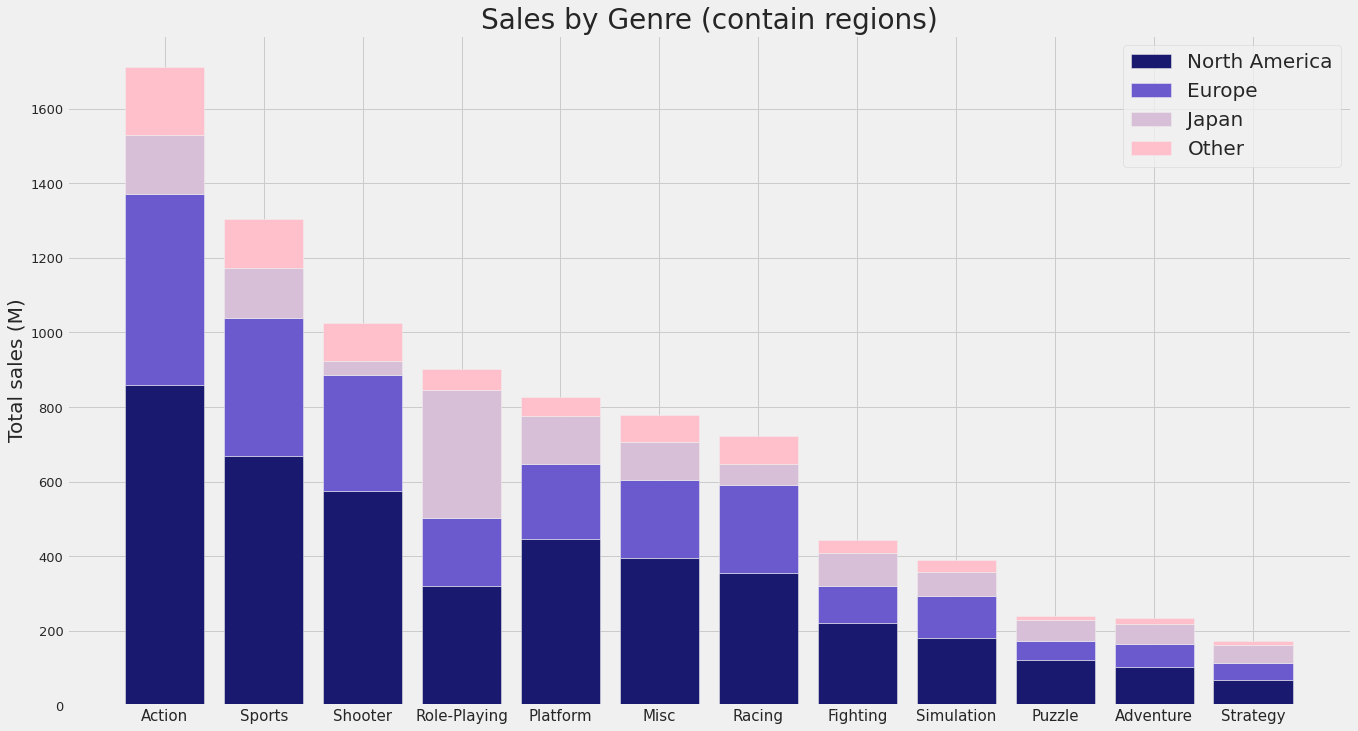

In [ ]:
g1 = df_drop.groupby("Genre")['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'] \
            .sum().sort_values(by='Total_Sales', ascending=False)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches([20.5, 11.5])
ax.bar(g1.index, g1['NA_Sales'], color = 'midnightblue', label ='North America')  
ax.bar(g1.index, g1['EU_Sales'], bottom= g1['NA_Sales'], color = 'slateblue', label ='Europe')
ax.bar(g1.index, g1['JP_Sales'], bottom = g1['NA_Sales']+g1['EU_Sales'], color = 'thistle', label ='Japan')
ax.bar(g1.index, g1['Other_Sales'], bottom = g1['NA_Sales']+g1['EU_Sales']+g1['JP_Sales'], 
                                    color = 'pink', label ='Other')

# ax.title("Preferred Game Genre by Region", fontsize=30)
# plt.xlabel("Genre of game", fontsize=20)
ax.set_ylabel("Total sales (M)", fontsize=20)
ax.tick_params(axis='y', labelsize=13)
ax.set_title("Sales by Genre (contain regions)", fontsize=28, y=1)
ax.legend(fontsize=20)
ax.tick_params(axis='x', labelsize=15)



### 1.3 지역별 장르 선호도

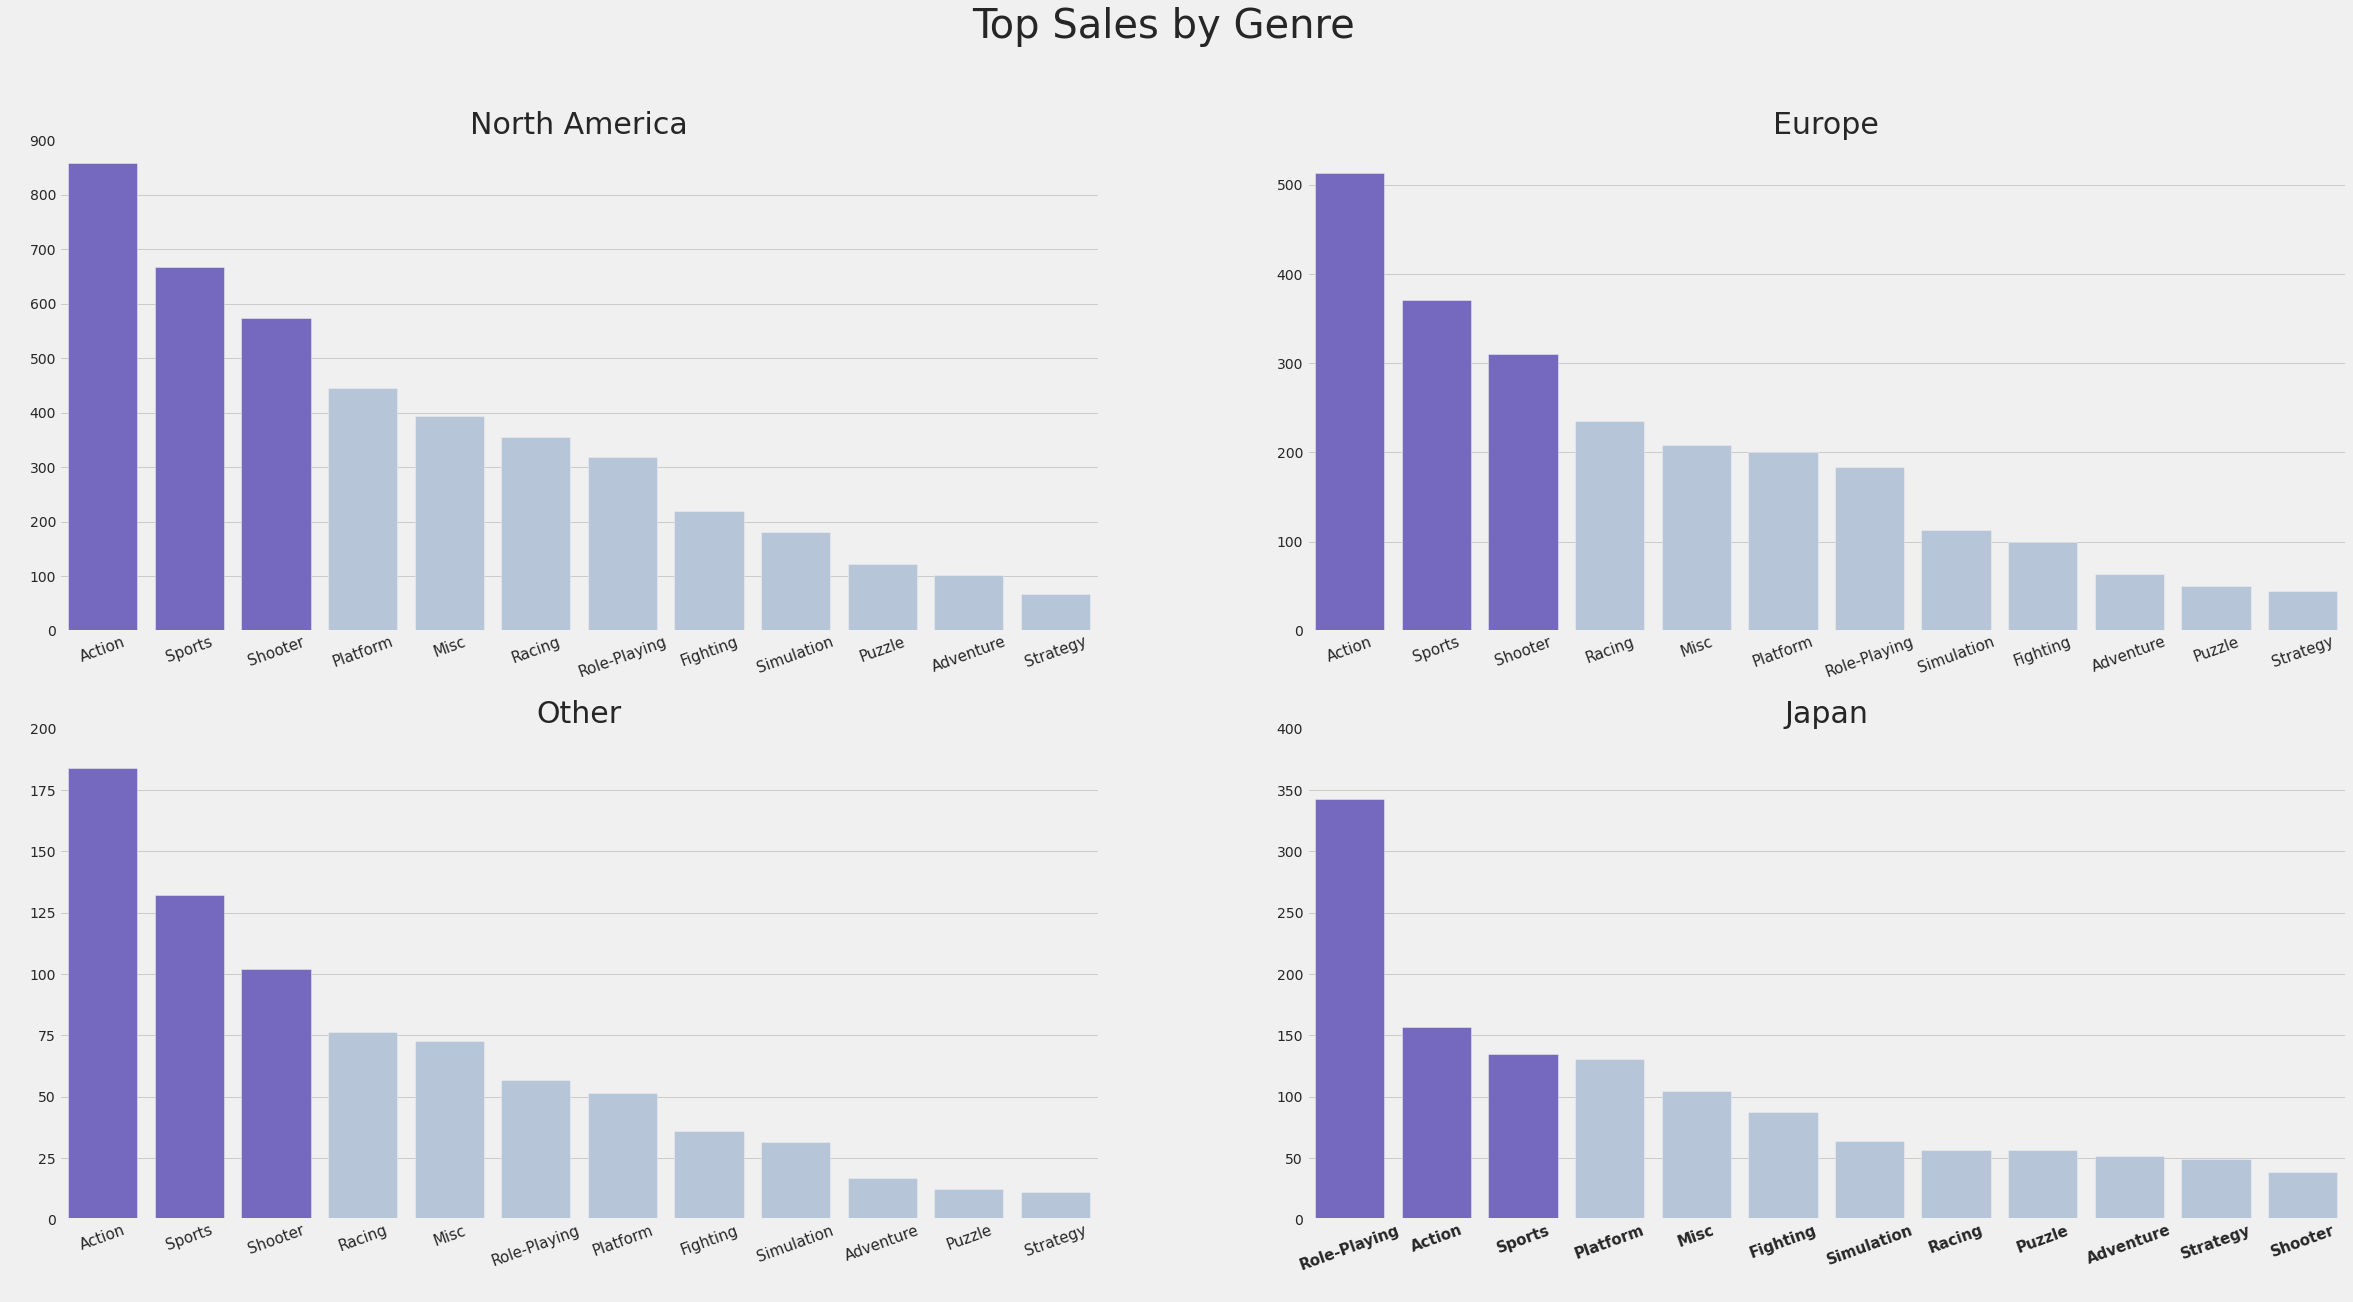

In [ ]:
plt.style.use('fivethirtyeight')
sns.set_palette(custom_palette('slateblue','lightsteelblue', 3, 12))


sales_region = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

fig, ax = plt.subplots(2,2,figsize=(36.5, 18.5))

sales_name = {"NA_Sales" : ("North America",ax[0][0]),
              "EU_Sales" : ("Europe",ax[0][1]),
              "JP_Sales" : ("Japan", ax[1][1]),
              "Other_Sales" : ("Other",ax[1][0])}

# index = pd.DataFrame(df_drop.groupby("Genre")['NA_Sales'].sum().sort_values(ascending=False)).index
          
for name in sales_region:  
  genre_sales = pd.DataFrame(df_drop.groupby("Genre")[name].sum().sort_values(ascending=False))
  sns.barplot(data = genre_sales, x=genre_sales.index, y=name, ci=None, ax=sales_name[name][1])
  sales_name[name][1].set_title(sales_name[name][0], fontsize=30,)
  sales_name[name][1].set_xlabel(" ") 
  sales_name[name][1].set_ylabel(" ") 
  sales_name[name][1].tick_params(axis='x', labelsize=15, rotation=20)
fig.suptitle("Top Sales by Genre", fontsize=40)
ax[0][0].set_ylim(0, 900)
ax[0][1].set_ylim(0, 550)
ax[1][0].set_ylim(0, 200)
ax[1][1].set_ylim(0, 400)  
plt.xticks(weight = 'bold')
plt.show()


### 1.1.2 **지역별 플랫폼**

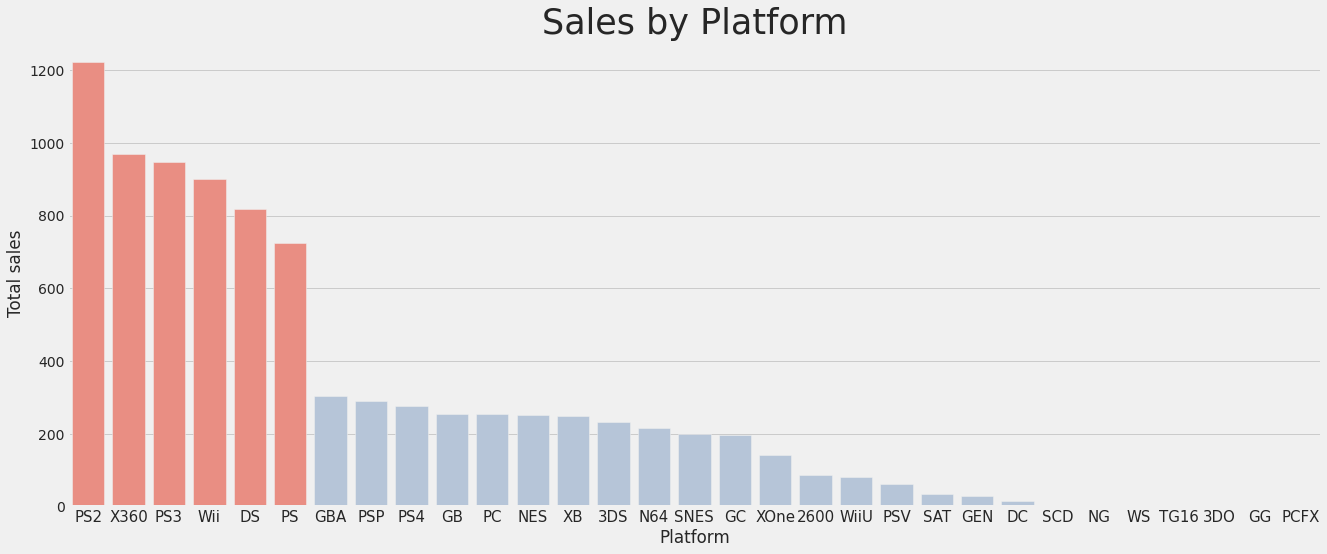

In [ ]:
#지역, 연도 불문 어떤 풀랫폼이 가장 많이 판매되었는가
plt.style.use('fivethirtyeight')

sns.set_palette(custom_palette('salmon','lightsteelblue', 6, 32))

total_sales_platform = pd.DataFrame(df_drop.groupby("Platform")['Total_Sales'].sum().sort_values(ascending=False))
plt.figure(figsize=(20,8))
ax = sns.barplot(data=total_sales_platform, x=total_sales_platform.index, y='Total_Sales', ci=None)
plt.title("Sales by Platform", fontsize="35")
ax.tick_params(axis='x', labelsize=15)
plt.ylabel("Total sales")
plt.show()

ps2, x360, ps3, wii DS, PS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


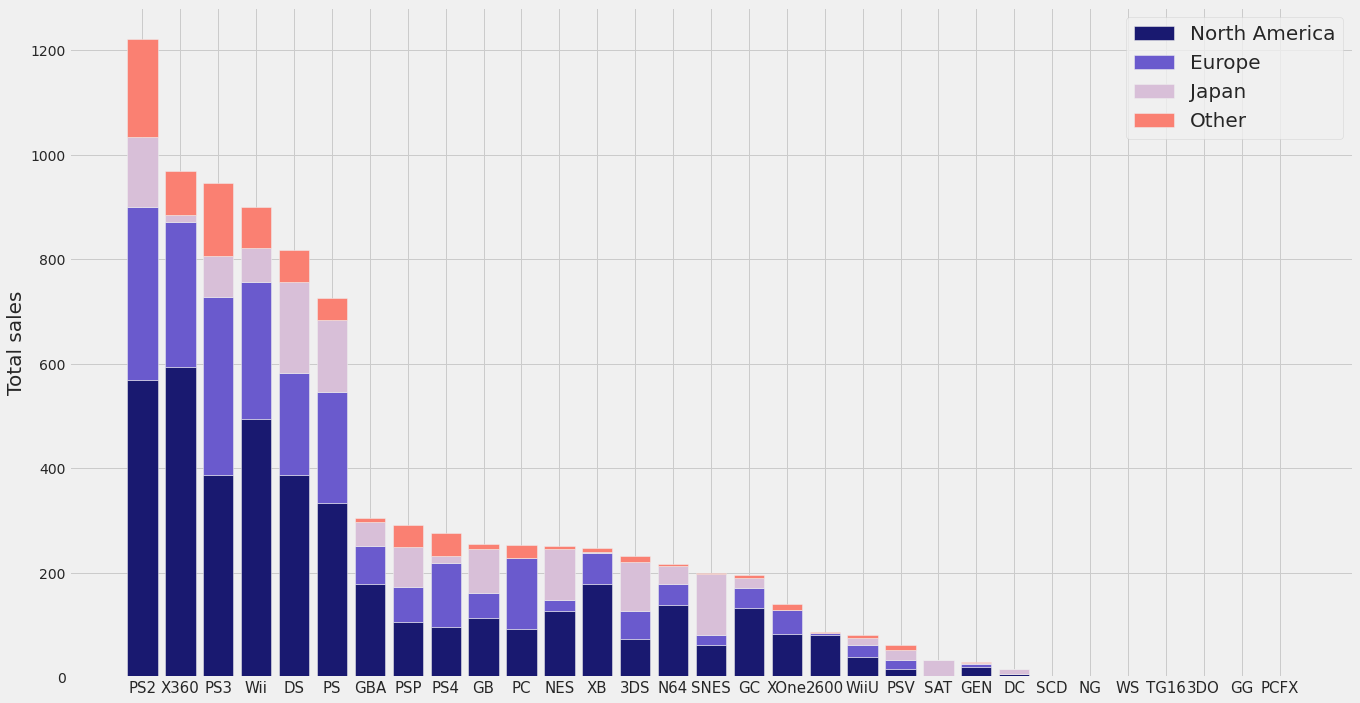

In [ ]:
g3 = df_drop.groupby("Platform")['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'] \
            .sum().sort_values(by='Total_Sales', ascending=False)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches([20.5, 11.5])
# fig.set_dpi(100)
ax.bar(g3.index, g3['NA_Sales'], color = 'midnightblue', label ='North America')  
ax.bar(g3.index, g3['EU_Sales'], bottom= g3['NA_Sales'], color = 'slateblue', label ='Europe')
ax.bar(g3.index, g3['JP_Sales'], bottom = g3['NA_Sales']+g3['EU_Sales'], color = 'thistle', label ='Japan')
ax.bar(g3.index, g3['Other_Sales'], bottom = g3['NA_Sales']+g3['EU_Sales']+g3['JP_Sales'], 
                                    color = 'salmon', label ='Other')

# ax.title("Preferred Game Genre by Region", fontsize=30)
# plt.xlabel("Genre of game", fontsize=20)
ax.set_ylabel("Total sales", fontsize=20)
ax.legend(fontsize=20)
ax.tick_params(axis='x', labelsize=15)


### 국가 비중 

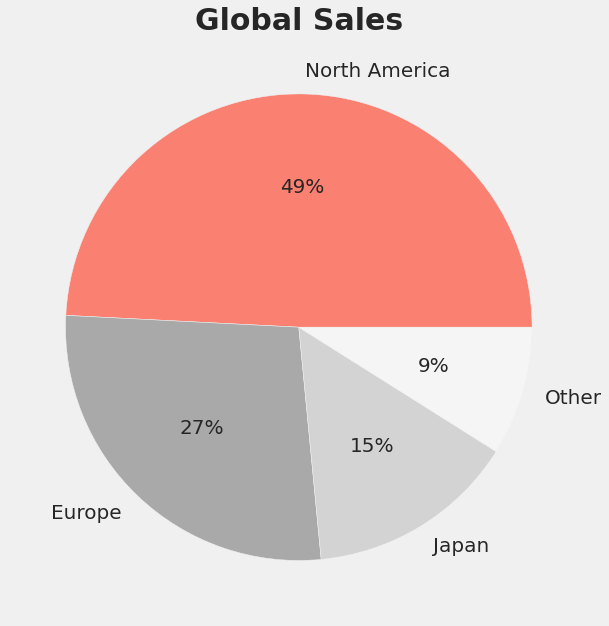

In [ ]:
colors = ['salmon', 'darkgray', 'lightgrey', 'whitesmoke']
data = list(df_drop[sales_region].sum())
region = ['North America', 'Europe', 'Japan', 'Other']
labels = region
myexplode = [0, 0, 0, 0]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
# plt.title("Total Sales Region")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 20}, startangle=0, explode=myexplode)
plt.title("Global Sales", fontsize="30", fontweight='bold', y=1)
# plt.title("1980~2020 total sales")
plt.show()

### 2- 연도별 트렌드
- 그 해 데이터가 아니라 출시일 년도임. 따라서 어떤 기간의
누적액이라 보는 것이 더 적절


### 년도별 출시된 게임 수 

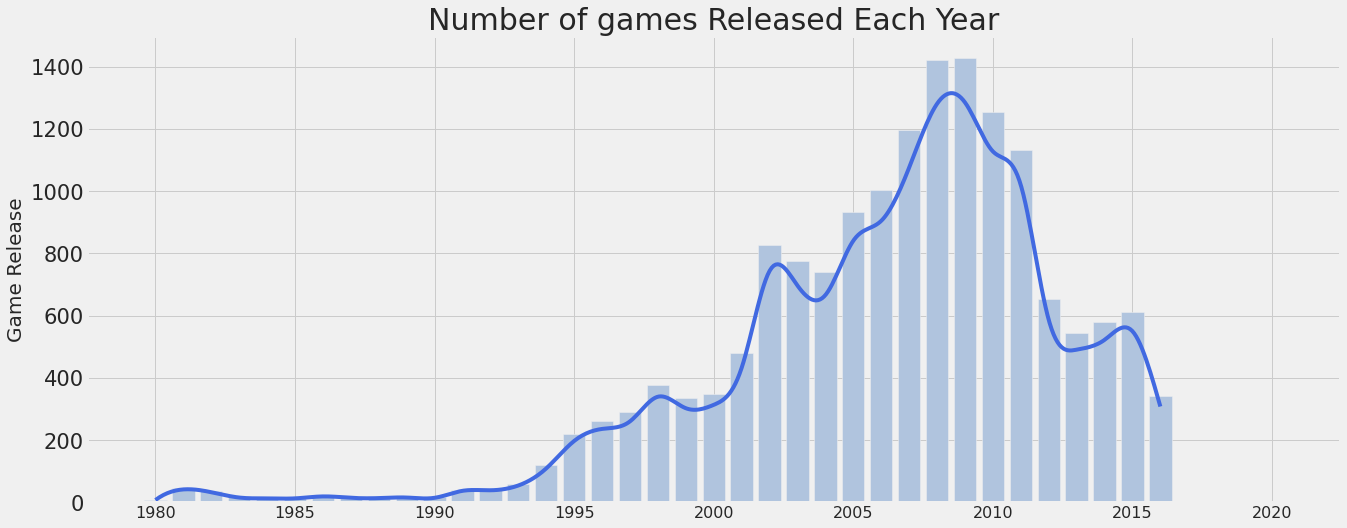

In [ ]:
# 출시된 게임의 갯수

plt.style.use('fivethirtyeight')
#막대그래프
by_year = df_drop['Year'].value_counts().sort_index(ascending=True)


plt.figure(figsize=(20,8))
plt.bar(by_year.index, by_year.values, color='lightsteelblue')
plt.ylabel("Game Release", fontsize=20) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=21)
plt.title("Number of games Released Each Year", fontsize=30)
#추세선
x = np.array(by_year.index)
y = np.array(by_year.values* 0.9)
model=make_interp_spline(x, y)

xs=np.linspace(x.min(),2016, 500)
ys=model(xs)

plt.plot(xs, ys, color='royalblue', linewidth='4') 
plt.show()

In [ ]:
df_drop[df_drop[['Name', 'Platform']].duplicated() == True]
df_drop[df_drop['Name']=='Need for Speed: Most Wanted'].query('Platform == "PC"')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2621,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
13514,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08


### 2.1 연도별, 출시 갯수(플랫폼별)

In [ ]:
# g2 = df_drop.pivot_table(index="Year",columns="Platform",values='Total_Sales', aggfunc='count')
# g2.fillna(0, inplace = True)

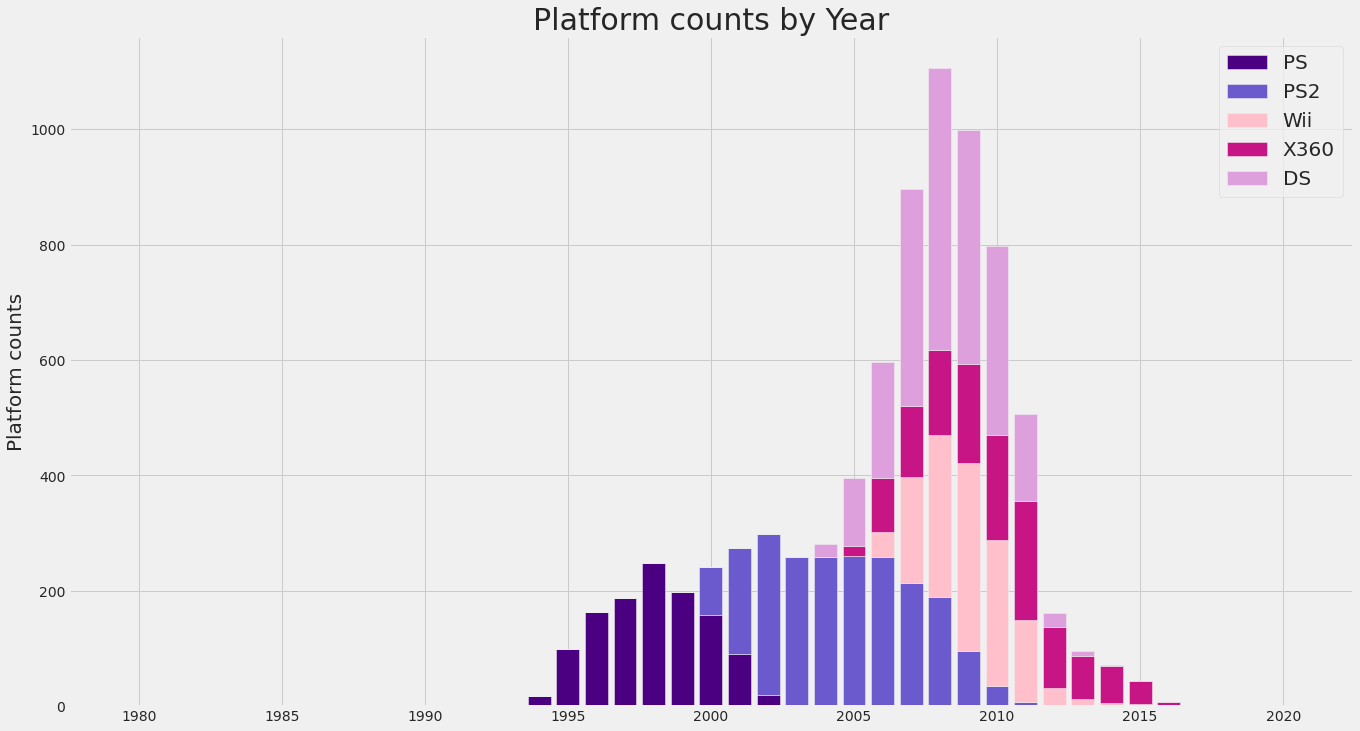

In [ ]:
# 연도별, 출시 갯수(플랫폼별)
g2 = df_drop.pivot_table(index="Year",columns="Platform",values='Total_Sales', aggfunc='count')
g2.fillna(0, inplace = True)

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches([20.5, 11.5])
ax.bar(g2.index, g2['PS'], color = 'indigo', label ='PS')  
ax.bar(g2.index, g2['PS2'], bottom= g2['PS'], color = 'slateblue', label ='PS2')
ax.bar(g2.index, g2['Wii'], bottom = g2['PS']+g2['PS2'], color = 'pink', label ='Wii')
ax.bar(g2.index, g2['X360'], bottom = g2['PS']+g2['PS2']+g2['Wii'], color = 'mediumvioletred', label ='X360')
ax.bar(g2.index, g2['DS'], bottom = g2['PS']+g2['PS2']+g2['Wii']+g2['X360'], color = 'plum' ,label ='DS')

ax.set_ylabel("Platform counts", fontsize=20)
ax.legend(fontsize=20)
plt.title("Platform counts by Year", fontsize=30, y=1)
plt.show()


In [ ]:
### 그 해 가장 많이 출시된 게임의 플랫폼 통계 

In [ ]:
g = df_drop.pivot_table(index="Year",columns="Platform",values='Total_Sales', aggfunc='count')
g.fillna(0, inplace = True)
g_sum = df_drop.pivot_table(index="Year",columns="Platform",values='Total_Sales', aggfunc='sum') 
g_sum.fillna(0, inplace = True)

for i in range(g.shape[0]):
  print(g.index[i], g.columns[g.iloc[i,:].rank(ascending=False)==1][0], g_sum.columns[g_sum.iloc[i,:].rank(ascending=False)==1][0] )


1980 2600 2600
1981 2600 2600
1982 2600 2600
1983 2600 NES
1984 NES NES
1985 NES NES
1986 NES NES
1987 NES NES
1988 NES NES
1989 GB GB
1990 NES SNES
1991 SNES SNES
1992 SNES SNES
1993 SNES SNES
1994 SNES SNES
1995 PS PS
1996 PS PS
1997 PS PS
1998 PS PS
1999 PS PS
2000 PS PS
2001 PS2 PS2
2002 PS2 PS2
2003 PS2 PS2
2004 PS2 PS2
2005 PS2 PS2
2006 PS2 Wii
2007 DS Wii
2008 DS Wii
2009 DS Wii
2010 DS X360
2011 PS3 PS3
2012 PS3 PS3
2013 PS3 PS3
2014 PS3 PS4
2015 PS4 PS4
2016 PS4 PS4
2017 PSV PS4
2020 DS DS


### 플랫폼 scatter plot

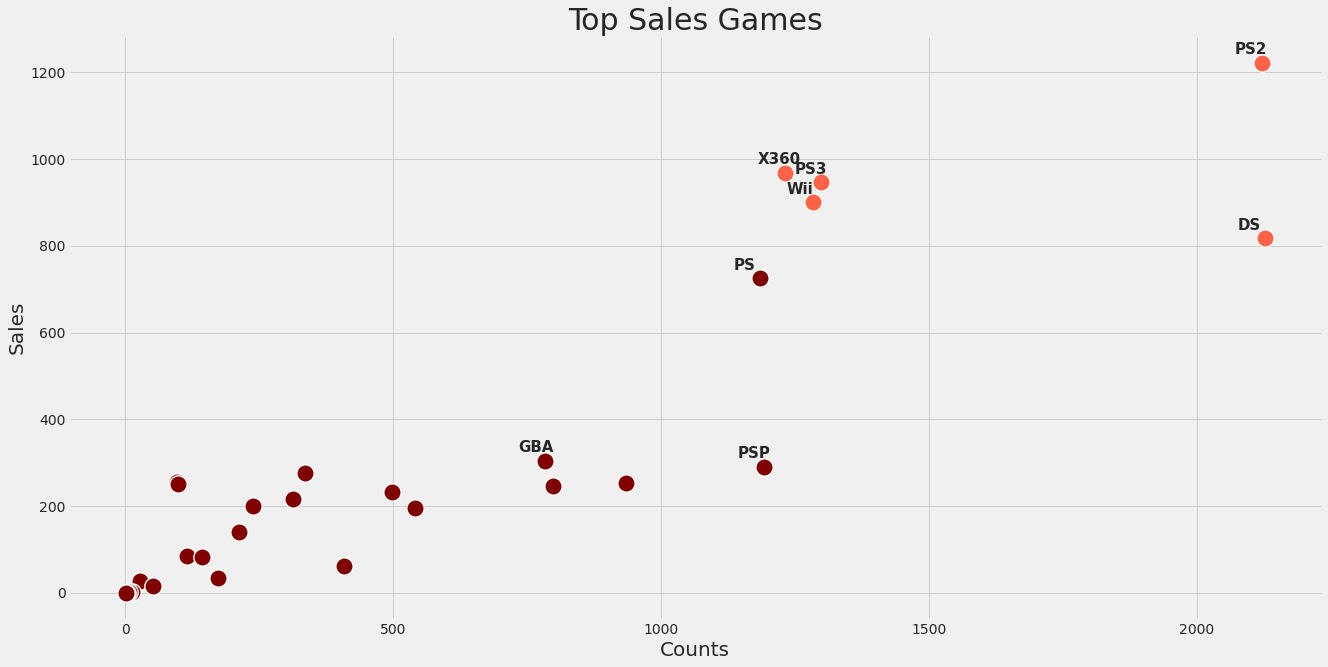

,count,sum
,Total_Sales,Total_Sales
Platform,,
PS2,2121,1222.44
X360,1231,968.59
PS3,1299,946.74
Wii,1284,900.15
DS,2127,817.19


In [ ]:
#플랫폼 별 판매량/판매수익
plt.style.use('fivethirtyeight')
g2 = df_drop.pivot_table(index="Platform",values='Total_Sales', aggfunc=['count', 'sum'])
g2 = g2.sort_values(by=('sum', 'Total_Sales'), ascending=False)
g2_top5 = g2[:5]
g2_last = g2[5:]
plt.figure(figsize=(20, 10))
sns.scatterplot(x=('count', 'Total_Sales'), y=('sum', 'Total_Sales'), data=g2_top5, s=300, color='tomato')
sns.scatterplot(x=('count', 'Total_Sales'), y=('sum', 'Total_Sales'), data=g2_last, s=300, color='maroon')

for i in range(8):
  plt.text(x=g2[('count', 'Total_Sales')][i]-50, y=g2[('sum', 'Total_Sales')][i]+20, s=g2.index[i],  
          fontdict=dict(size=15, weight='bold'))

plt.title("Top Sales Games", fontsize=30)
plt.xlabel("Counts", fontsize=20)
plt.ylabel("Sales", fontsize=20)

plt.show()

g2.head()


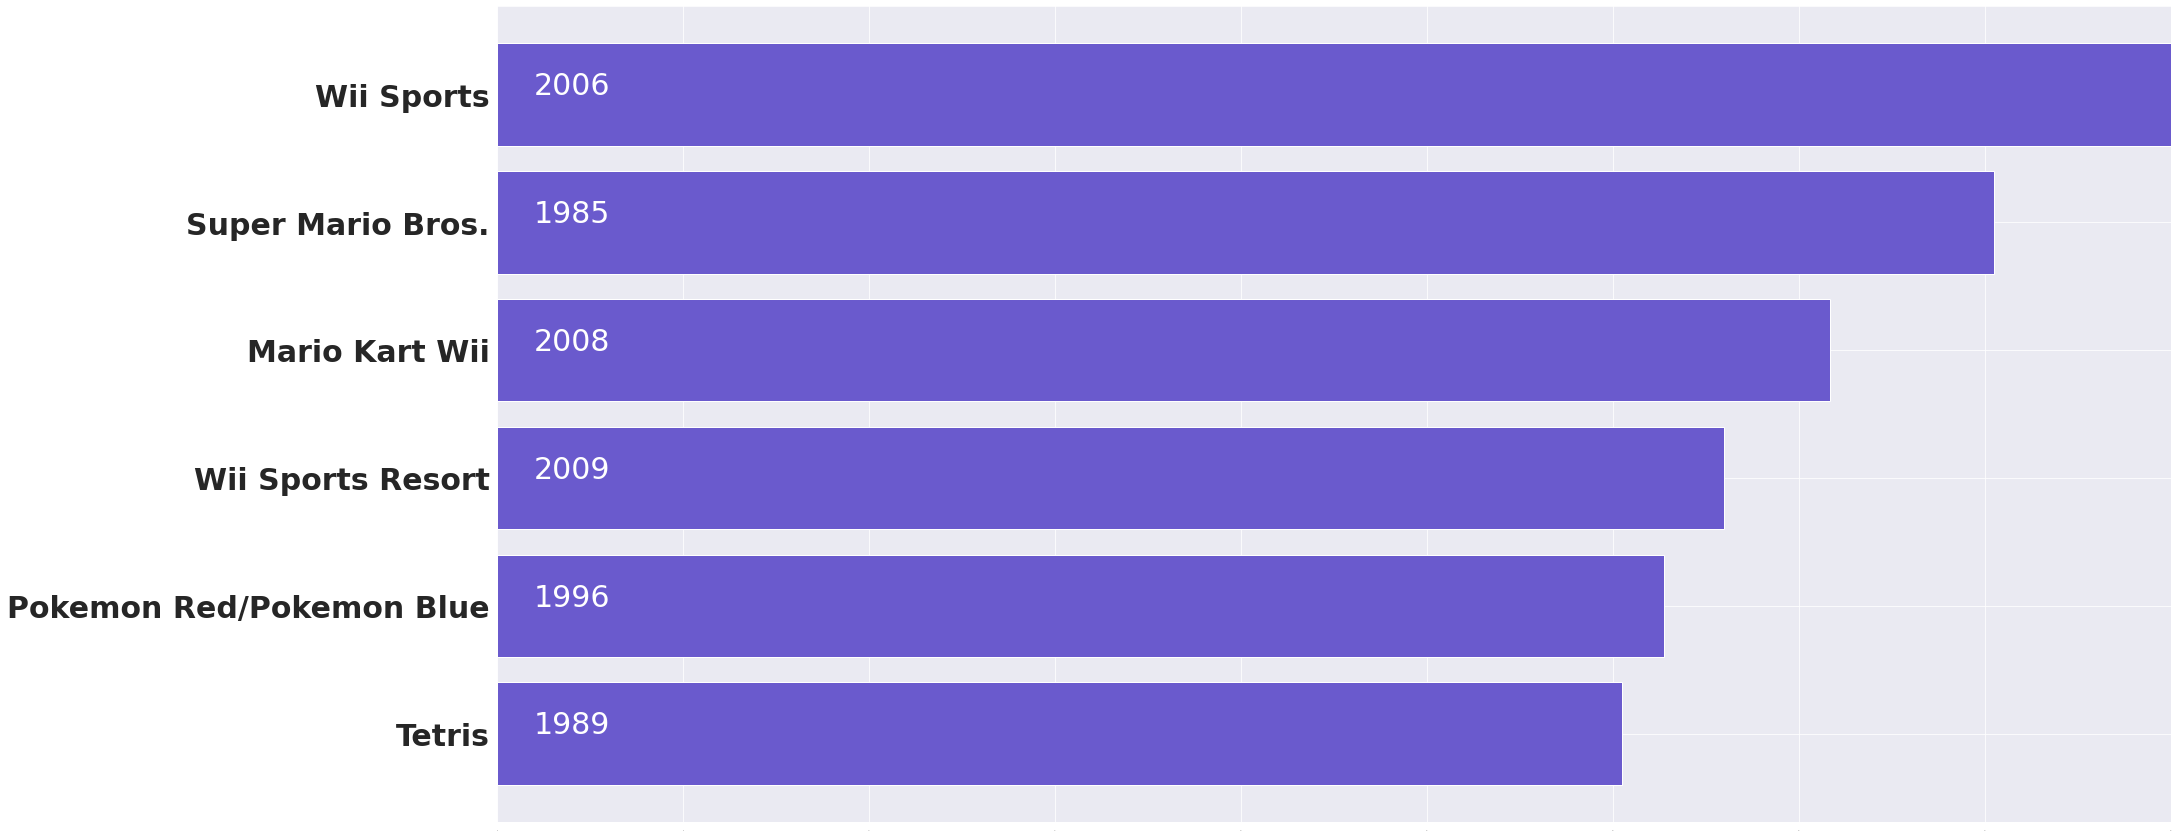

In [ ]:
# top 5만
top_games = df_drop.sort_values(by=['Total_Sales'], ascending=True)[-6:]
top_games = top_games[['Name','Platform','Year','Genre','Total_Sales']].reset_index(drop=True)

name = top_games['Name']
year = top_games['Year']
genre = top_games['Genre']
sales = top_games['Total_Sales']



plt.figure(figsize=(30, 15))
plt.barh(name, sales)

for i, value in enumerate(sales):
  plt.text(1, i, year[i], fontsize=30, color="white")

# plt.xticks(y, top_games['Year'], fontsize=14, rotation=90)
# plt.title("Top Sales Games", fontsize=30)
# plt.ylabel("Games", fontsize=20)
plt.yticks(fontsize=30, weight='bold')
plt.xticks(fontsize=0)
# plt.xlabel("Total Sales (K)", fontsize=20)
plt.xlim(0, 45)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


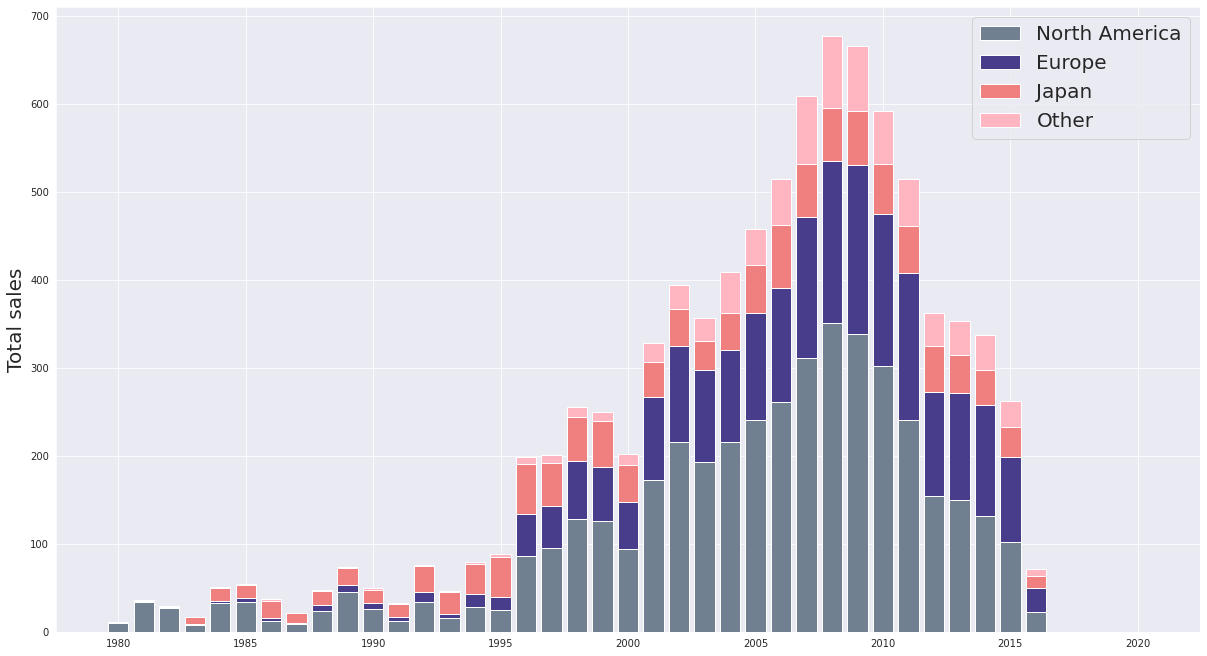

In [ ]:
# #연도별 지역 매출(누적)

g2 = df_drop.groupby("Year")['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'].sum()
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches([20.5, 11.5])
ax.bar(g2.index, g2['NA_Sales'], color = 'slategrey', label ='North America')  
ax.bar(g2.index, g2['EU_Sales'], bottom= g2['NA_Sales'], color = 'darkslateblue', label ='Europe')
ax.bar(g2.index, g2['JP_Sales'], bottom = g2['NA_Sales']+g2['EU_Sales'], color = 'lightcoral', label ='Japan')
ax.bar(g2.index, g2['Other_Sales'], bottom = g2['NA_Sales']+g2['EU_Sales']+g2['JP_Sales'], 
                                    color = 'lightpink', label ='Other')

# plt.title("Sales by Region", fontsize=30)
# plt.xlabel("Release Year", fontsize=20)
ax.set_ylabel("Total sales", fontsize=20)
ax.legend(fontsize=20)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


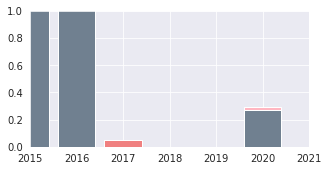

In [ ]:
# 구석값
g2 = df_drop.groupby("Year")['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'].sum()
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches([5, 2.5])
ax.bar(g2.index, g2['NA_Sales'], color = 'slategrey', label ='North America')  
ax.bar(g2.index, g2['EU_Sales'], bottom= g2['NA_Sales'], color = 'darkslateblue', label ='Europe')
ax.bar(g2.index, g2['JP_Sales'], bottom = g2['NA_Sales']+g2['EU_Sales'], color = 'lightcoral', label ='Japan')
ax.bar(g2.index, g2['Other_Sales'], bottom = g2['NA_Sales']+g2['EU_Sales']+g2['JP_Sales'], 
                                    color = 'lightpink', label ='Other')

ax.set_ylim(0, 1)
ax.set_xlim(2015, 2021)
plt.show()

### 2.1 연도별 표 함수

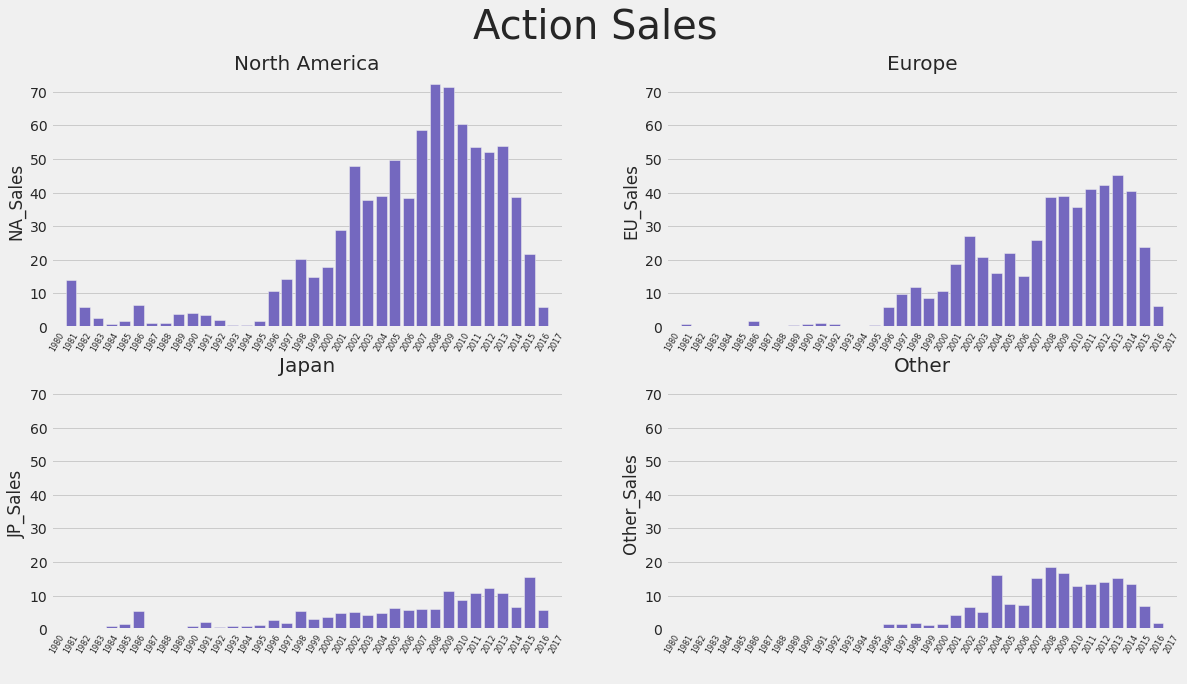

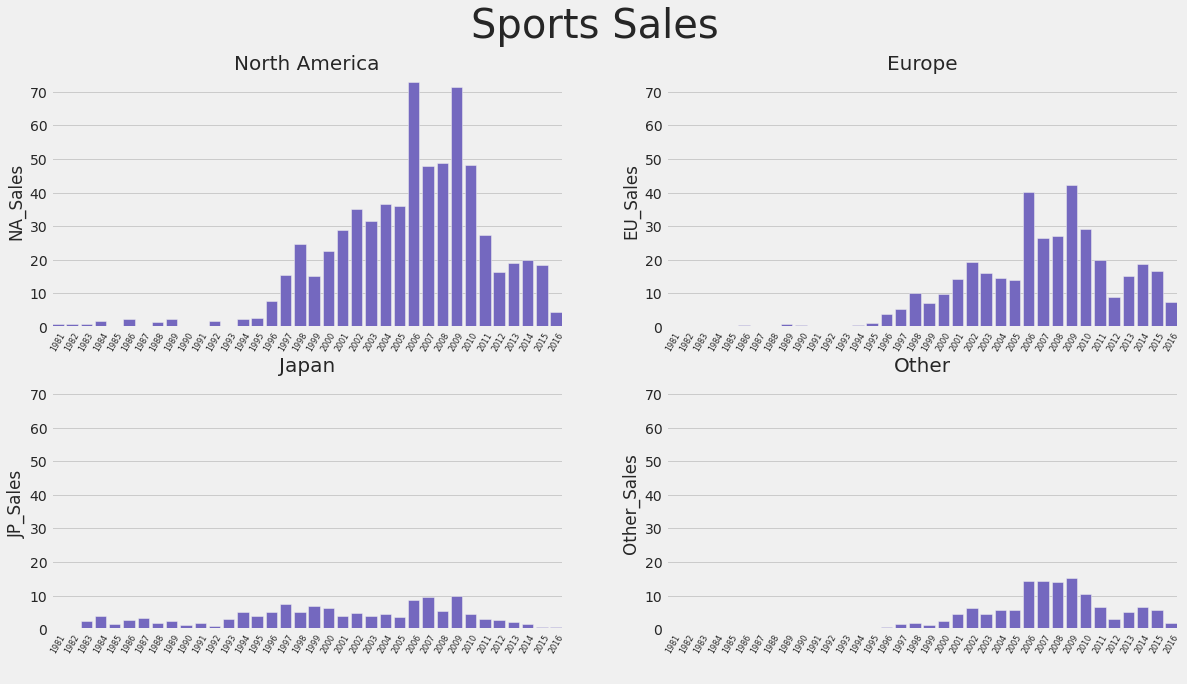

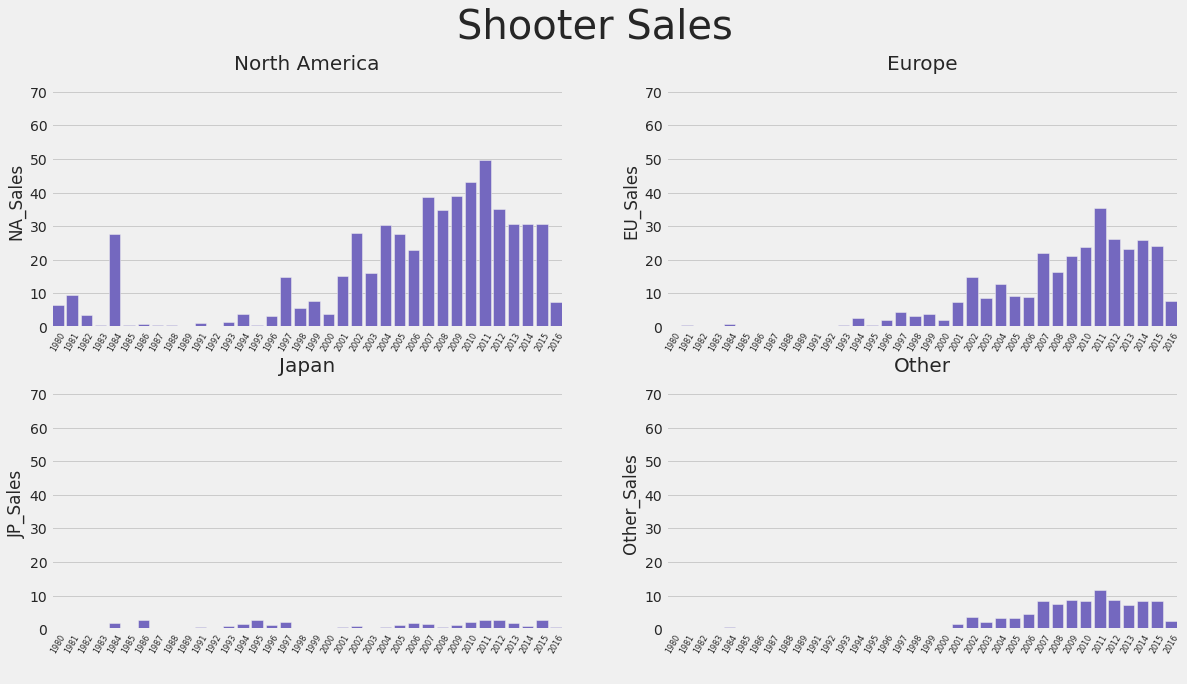

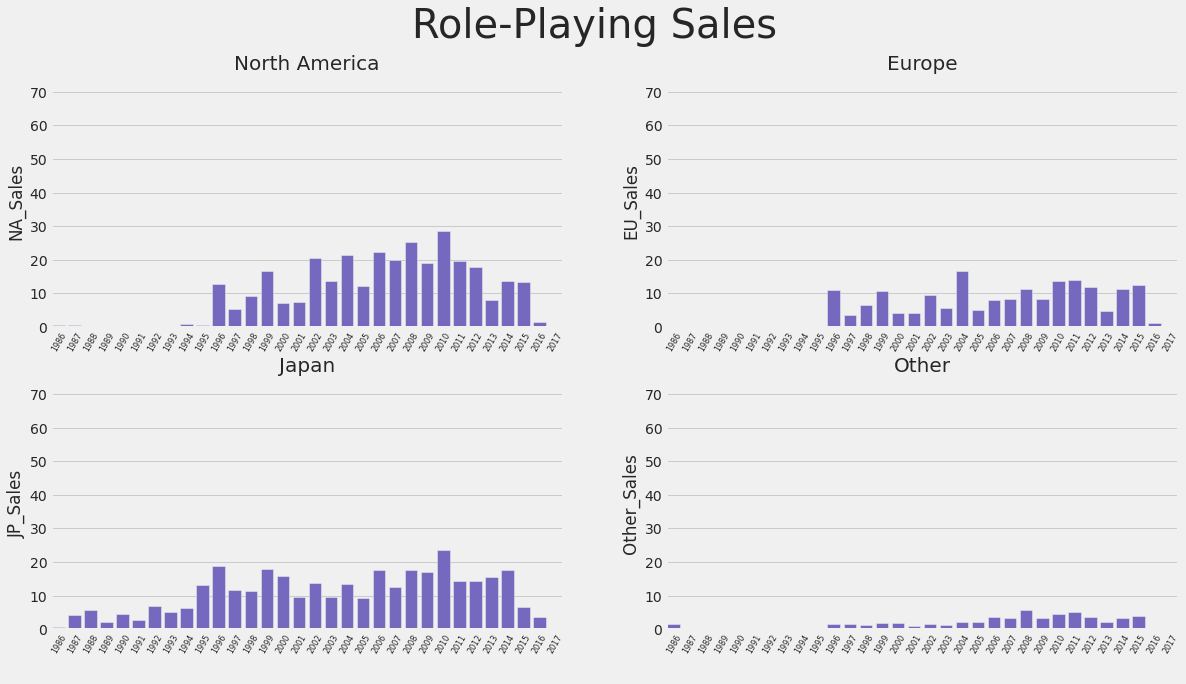

In [ ]:
# 장르별 시간순 판매량 함수 
def years_genre(genre):
  fig, ax = plt.subplots(2,2)
  fig.set_size_inches([18, 9.5])

  sales_region = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]
  sales_name = {"NA_Sales" : ("North America",ax[0][0]),
                "EU_Sales" : ("Europe",ax[0][1]),
                "JP_Sales" : ("Japan", ax[1][0]),
                "Other_Sales" : ("Other",ax[1][1])}



  for name in sales_region:  
    years = pd.DataFrame(df_drop.loc[df_drop['Genre']==genre].groupby("Year")[name].sum())
    sns.barplot(data = years, x=years.index, y=name, ci=None, ax=sales_name[name][1], color='slateblue')
    sales_name[name][1].set_title(sales_name[name][0], fontsize=20)
    sales_name[name][1].set_xticklabels(years.index, rotation=60)
    sales_name[name][1].set_xlabel(" ") 
    sales_name[name][1].tick_params(axis='x', labelsize=8)
    sales_name[name][1].set_ylim(0, 75)    

  plt.suptitle(genre+" Sales", fontsize=40)  
  return plt.show()

plt.style.use('fivethirtyeight')
years_genre('Action')
years_genre('Sports')
years_genre('Shooter')
years_genre('Role-Playing')

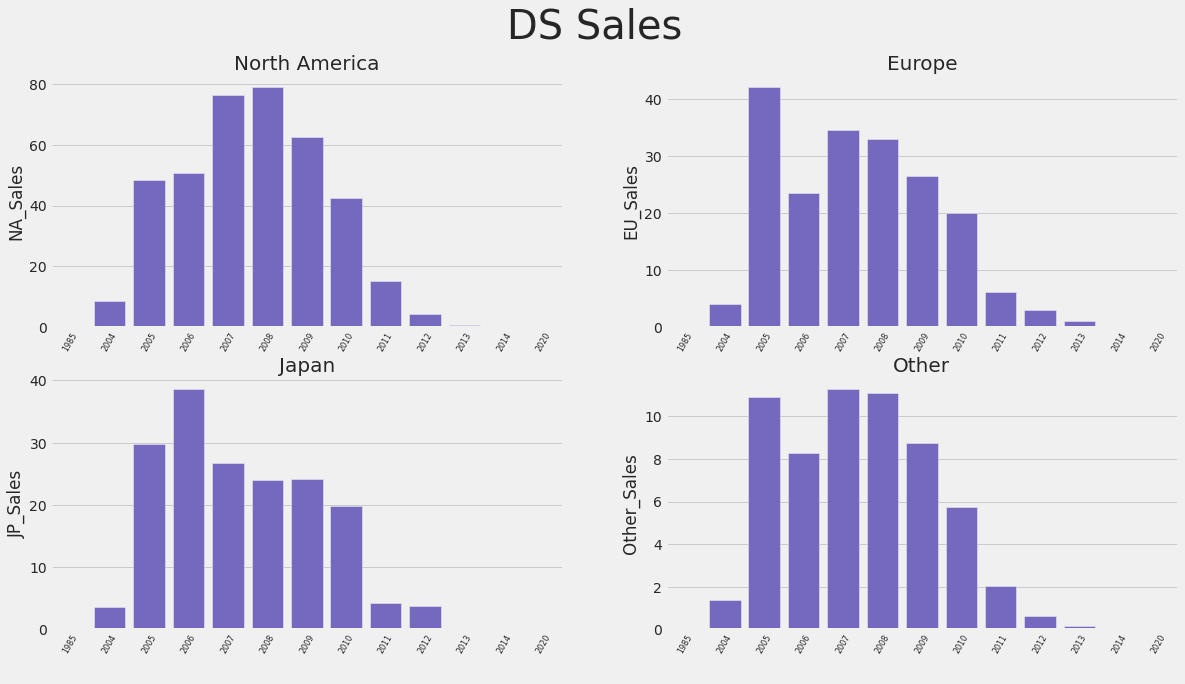

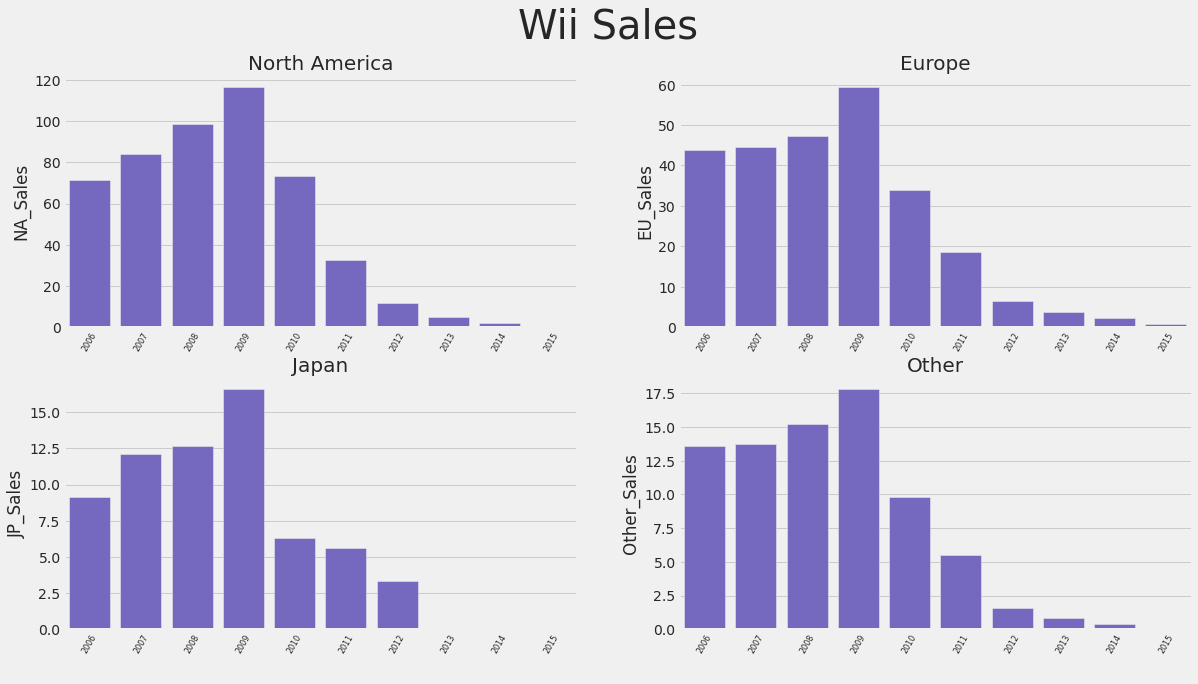

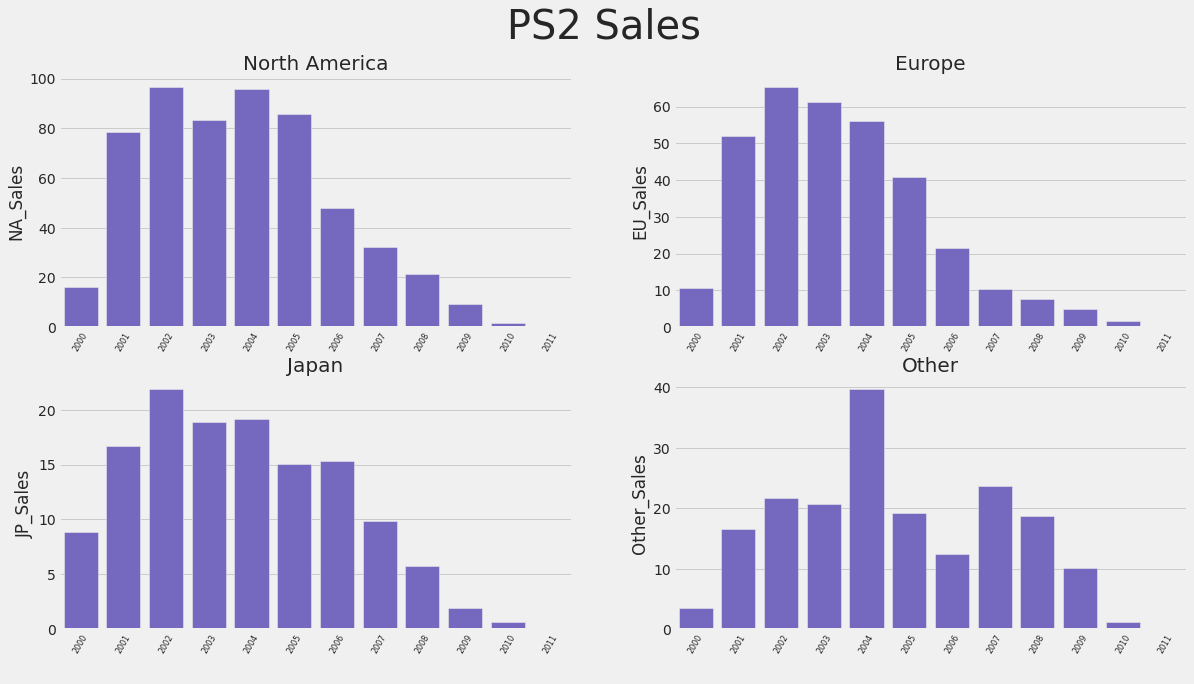

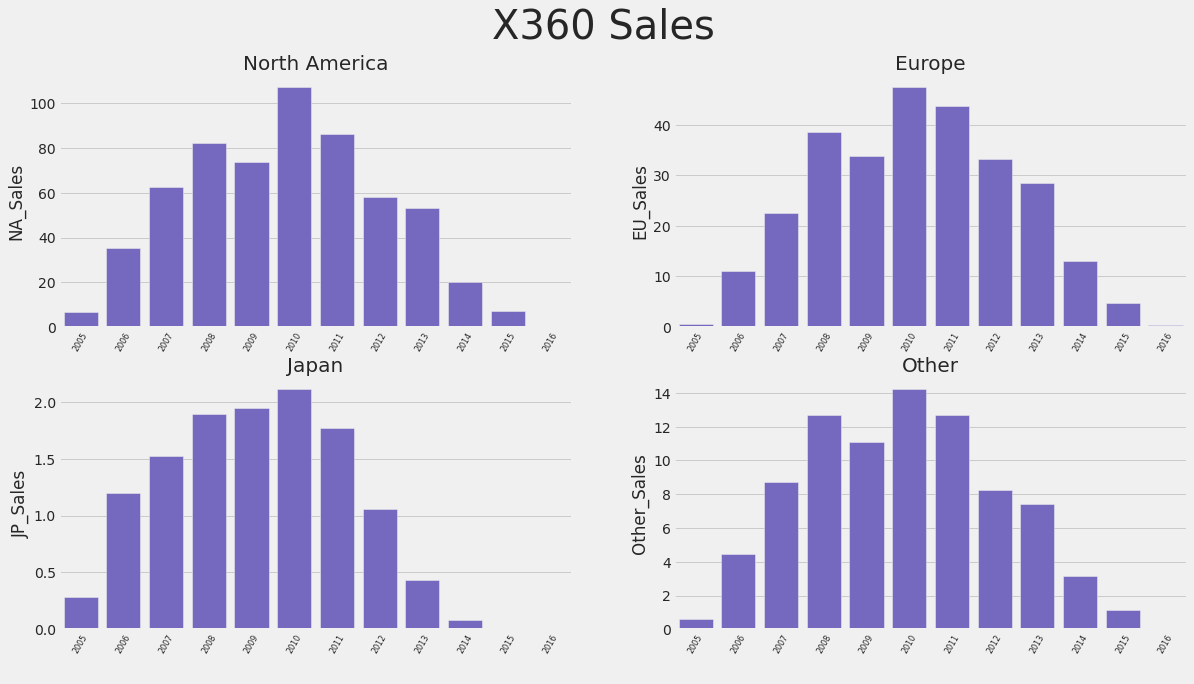

In [ ]:
# 플랫폼별 판매량  
def years_genre(genre):
  fig, ax = plt.subplots(2,2)
  fig.set_size_inches([18, 9.5])

  sales_region = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]
  sales_name = {"NA_Sales" : ("North America",ax[0][0]),
                "EU_Sales" : ("Europe",ax[0][1]),
                "JP_Sales" : ("Japan", ax[1][0]),
                "Other_Sales" : ("Other",ax[1][1])}



  for name in sales_region:  
    years = pd.DataFrame(df_drop.loc[df_drop['Platform']==genre].groupby("Year")[name].sum())
    sns.barplot(data = years, x=years.index, y=name, ci=None, ax=sales_name[name][1], color='slateblue')
    sales_name[name][1].set_title(sales_name[name][0], fontsize=20)
    sales_name[name][1].set_xticklabels(years.index, rotation=60)
    sales_name[name][1].set_xlabel(" ") 
    sales_name[name][1].tick_params(axis='x', labelsize=8)
    # sales_name[name][1].set_ylim(0, 75)    

  plt.suptitle(genre + " Sales", fontsize=40)  
  return plt.show()
plt.style.use('fivethirtyeight')

years_genre('DS')
years_genre('Wii')
years_genre('PS2')
years_genre('X360')

### 3 매출 높은 게임 

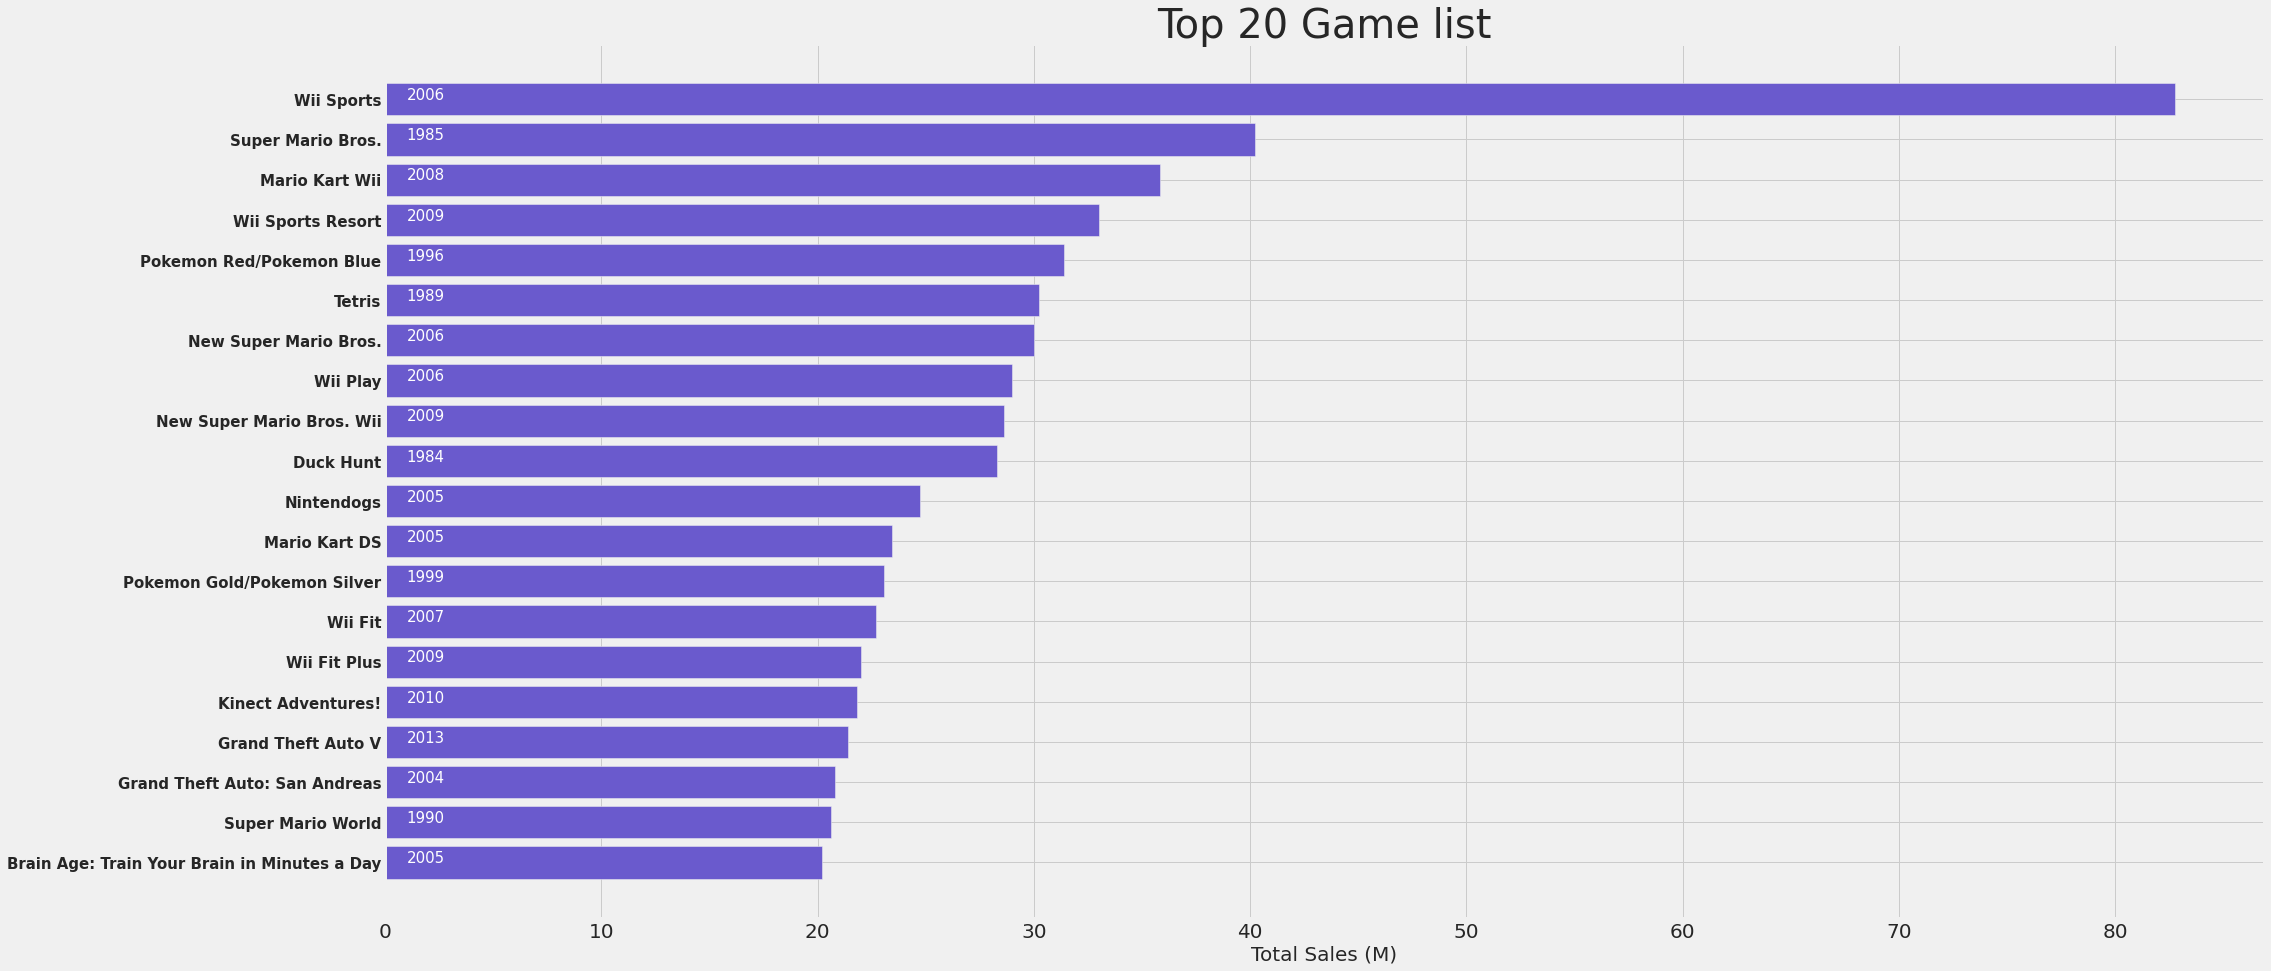

In [ ]:
#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스
plt.style.use('fivethirtyeight')
palette= ['slateblue']
sns.set_palette(palette)

# 가장 판매 높은 20개 
top_games = df_drop.sort_values(by=['Total_Sales'], ascending=True)[-20:]
top_games = top_games[['Name','Platform','Year','Genre','Total_Sales']].reset_index(drop=True)

name = top_games['Name']
year = top_games['Year']
genre = top_games['Genre']
sales = top_games['Total_Sales']
platform = top_games['Platform']


plt.figure(figsize=(30, 15))
graph = plt.barh(name, sales)


for i, value in enumerate(sales):
  plt.text(1, i, year[i], fontsize=15, color="white")

# plt.xticks(y, top_games['Year'], fontsize=14, rotation=90)
# plt.title("Top Sales Games", fontsize=30)
# plt.ylabel("Games", fontsize=20)
plt.yticks(fontsize=15, weight='bold')
plt.xticks(fontsize=20)
plt.xlabel("Total Sales (M)", fontsize=20)
plt.title("Top 20 Game list", fontsize=40, y=1)
plt.show()


### 기업별 매출액

In [ ]:
df_drop[df_drop.Publisher == 'Nintendo']['Platform'].value_counts()
# df[df.Publisher == 'Sony Computer Entertainment']['Platform'].value_counts()
# df[df.Publisher == 'Microsoft Game Studios']['Platform'].value_counts()

DS      149
GBA      91
3DS      81
Wii      80
GB       60
N64      58
GC       52
NES      45
WiiU     40
SNES     36
Name: Platform, dtype: int64

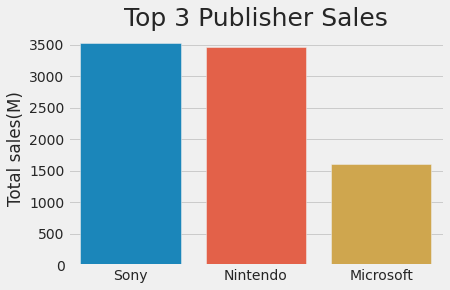

In [ ]:
plt.style.use('fivethirtyeight')
Sony = df_drop[(df_drop.Platform == 'PSP') | (df_drop.Platform == 'PS') | (df_drop.Platform == 'PS2') | (df_drop.Platform == 'PS3') |(df_drop.Platform == 'PS4') | (df_drop.Platform == 'PSV') ]
Nintendo = df_drop[(df_drop.Platform == '3DS') | (df_drop.Platform == 'DS') | (df_drop.Platform == 'N64') | (df_drop.Platform == 'Wii') | (df_drop.Platform == 'WiiU') |(df_drop.Platform == 'NES') | (df_drop.Platform == 'GB') 
                      | (df_drop.Platform == 'GBA') | (df_drop.Platform == 'GC') |(df_drop.Platform == 'SNES')]
Microsoft = df_drop[(df_drop.Platform == 'X360') | (df_drop.Platform == 'XB') | (df_drop.Platform == 'PC') | (df_drop.Platform == 'XOne')]

#
y1 = Sony['Total_Sales'].sum()
y2 = Nintendo['Total_Sales'].sum()
y3 = Microsoft['Total_Sales'].sum()
plt.title("Top 3 Publisher Sales", fontsize=25, y=1)
plt.ylabel("Total sales(M)")
sns.barplot(x=['Sony', 'Nintendo', 'Microsoft'], y=[y1, y2, y3])

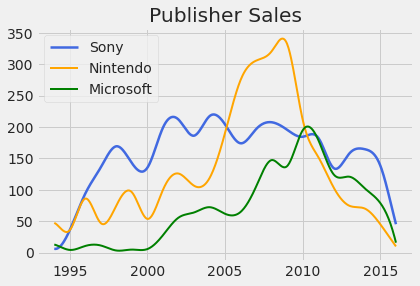

In [ ]:
plt.style.use('fivethirtyeight')
y1 = Sony.groupby(['Year']).Total_Sales.sum()
y2 = Nintendo.groupby(['Year']).Total_Sales.sum()
y3 = Microsoft.groupby(['Year']).Total_Sales.sum()
plt.legend(('Sony', 'Nintendo', 'Microsoft'))

#추세선

x1 = np.array(y1.index)
x2 = np.array(y2.index)
x3 = np.array(y3.index)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
model1=make_interp_spline(x1, y1)
model2=make_interp_spline(x2, y2)
model3=make_interp_spline(x3, y3)

xs=np.linspace(x1.min(),2016, 500)
ys1=model1(xs)
ys2=model2(xs)
ys3=model3(xs)

plt.plot(xs, ys1, color='royalblue', linewidth='2.5') 
plt.plot(xs, ys2, color='orange', linewidth='2')
plt.plot(xs, ys3, color='green', linewidth='2')
plt.legend(('Sony', 'Nintendo', 'Microsoft'))
plt.title("Publisher Sales")
plt.show()

## 결론(전략)

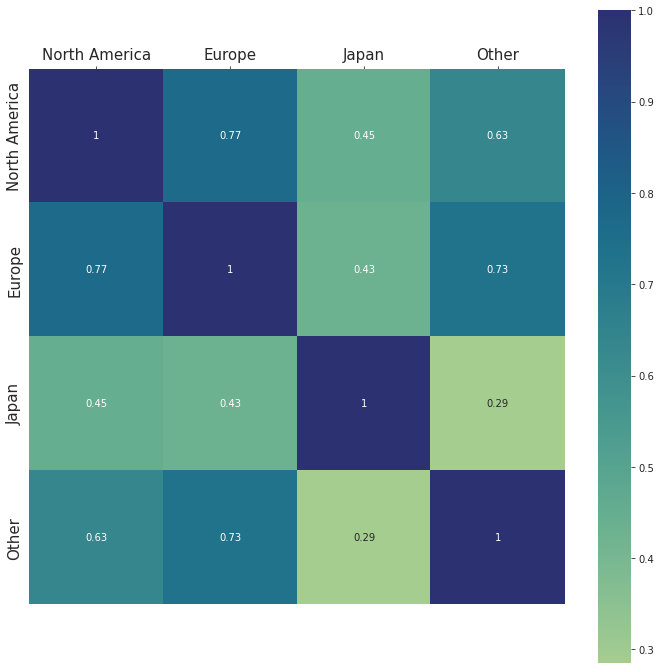

In [ ]:
sales_corr = df_drop[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(sales_corr, annot=True, square=True ,cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(["North America", "Europe", "Japan", "Other"], size=15)
ax.set_yticklabels(["North America", "Europe", "Japan", "Other"], size=15)
plt.show()



In [ ]:
from scipy.stats import chi2_contingency
df_chi = df_drop.groupby(['Genre']).sum() #groupby로 북미, 유럽, 일본, 나머지 지역으로 묶인 '지역'(범주변수)와 '장르'(범주변수)의 카이제곱 검정 
df_chi = df_chi.iloc[:,1:] 

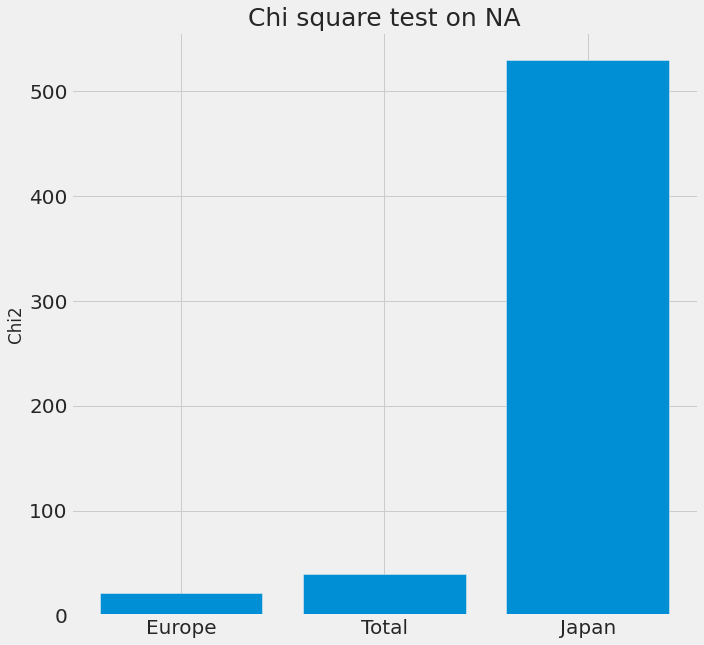

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,10))
label = ['Europe', 'Total', 'Japan']
chi = [21.08, 39.61, 530.12]
plt.title("Chi square test on NA", fontsize=25)
plt.yticks(fontsize="20")
plt.ylabel("Chi2")
plt.xticks(fontsize="20")
plt.bar(label, chi)
plt.show()


### 카이제곱검정

In [ ]:
# 북미와 유럽의 장르 선호도는 차이가 있을까?

# 귀무가설 : 차이가 없다(=0이다/선호도가 같다)
# 대립가설 : 차이가 있다(0이 아니다/국가 따라 선호도에 차이가 있다) 

chi2, p, dof, ex = chi2_contingency(df_chi.iloc[:,:2], correction=False)
chi2, p 
# pvalue=0.03 
#0.05일 경우 귀무가설 기각(0.01일 경우 귀무가설 채택 가능) 카이제곱통계량은 21


(21.088600434108784, 0.03246465882810863)

In [ ]:
# 북미는 전체 통계량의 대표로 대체할 수 있을까?

# 귀무가설 : 대체 가능하다(차이가 없다)
# 대립가설 : 북미는 대표가 될 수 없다(차이가 있다, 0이 아니다)

chi2, p, dof, ex = chi2_contingency(df_chi[['NA_Sales','Total_Sales']], correction=False)
chi2, p 
## p값 유의수준 보다 작으므로 귀무가설 기각. 

(39.61648487306485, 4.159991297175813e-05)

In [ ]:
# 일본은 미국과 얼마나 다른가?

chi2, p, dof, ex = chi2_contingency(df_chi[['JP_Sales','NA_Sales']], correction=False)
chi2 
# 미국-유럽에 비해 카이제곱통계량이 훨씬 크다. 

530.1240105011839

In [ ]:
# 장르 - 플랫폼 간의 관계는 ? 
# 귀무가설 : 차이가 없다(=0이다/ 연관되어 있다)
# 대립가설 : 차이가 있다(0이 아니다/ 관련 없다) 
table = pd.crosstab(df_drop.Genre,df_drop.Platform)
chi2, p, dof, ex = chi2_contingency(table, correction=False)
chi2, p # 귀무가설 기각. 장르에 종속적으로 플랫폼을 고를 필요는 없다

(5820.019068400998, 0.0)

In [ ]:
table = pd.crosstab(df_drop.Year, df_drop.Platform)
# chi2, p, dof, ex = chi2_contingency(table, correction=False)
# chi2, p 

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
